# 1. Obtain and review raw data

In [1]:
import pandas as pd

# Define file containing dataset
runkeeper_file = 'cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col='Date')

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2012-09-08 08:35:02,730f5507-59cc-43e6-b696-387f0946c57e,Running,NaN,3.27,15:55,4:52,12.32,231.0,15,NaN,NaN,NaN,2012-09-08-083502.gpx
2013-04-17 19:27:15,3d9dd7e0-dbbe-4eaa-9419-66c80a795702,Running,NaN,6.48,32:49,5:04,11.84,452.0,37,NaN,NaN,NaN,2013-04-17-192715.gpx
2017-04-06 19:07:46,344ece5a-187e-418e-9287-0e8a11a07643,Running,NaN,8.65,42:24,4:54,12.25,595.0,87,156.0,NaN,TomTom MySports Watch,2017-04-06-190746.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

# 2.Data preprocessing

In [19]:
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
df_activities.drop(columns=cols_to_drop, inplace=True)

# Count types of training activities
display(df_activities['Type'].value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling')

# Count missing values for each column
df_activities.isnull().sum()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

# 3.Dealing with missing values

In [20]:
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

# Count missing values for each column in running data
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [21]:
df_run

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0
...,...,...,...,...,...,...,...
2012-09-08 08:35:02,Running,3.27,15:55,4:52,12.32,15,144.0
2012-09-04 19:12:17,Running,6.26,32:35,5:12,11.53,34,144.0
2012-09-02 08:41:31,Running,3.14,16:16,5:11,11.56,18,144.0


# 4.Plot running data

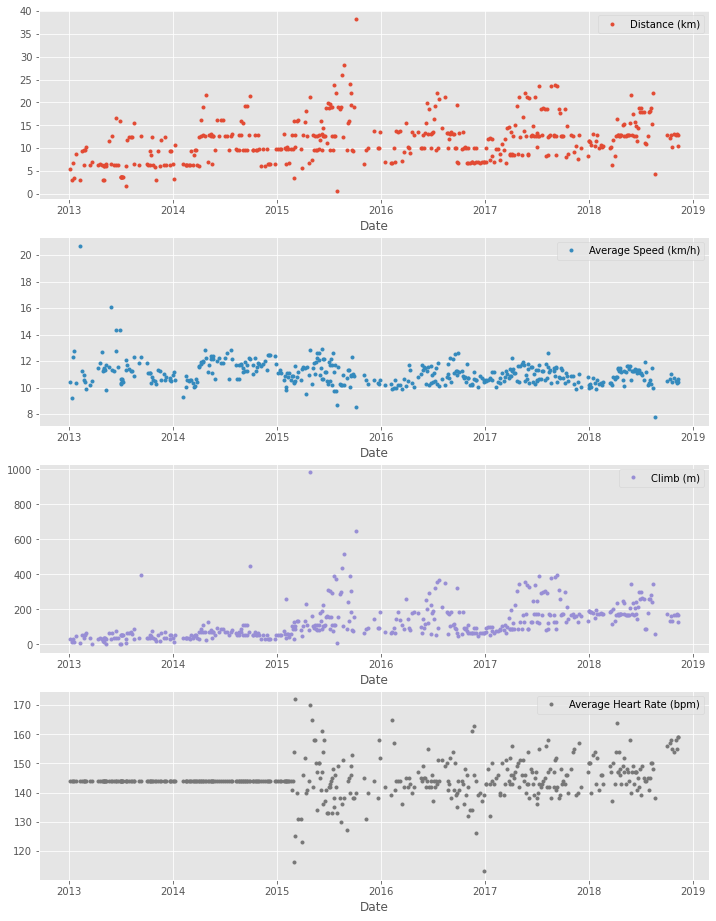

In [23]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run[(df_run.index.year>=2013) & (df_run.index.year<=2018)]

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

# Show plot
plt.show()

# 5. Running statistics

In [24]:
#prepare running data for the last 4 years
runs_subset_2015_2018 = df_run[(df_run.index.year>=2015) & (df_run.index.year<=2018)]

#calculate annual statistics
print('weekly averages of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean().mean())

#mean weekly counts
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainigs per week I had on average:',weekly_counts_average)

weekly averages of last 4 years:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

How many trainigs per week I had on average: 1.5


# 6. Visualization with averages

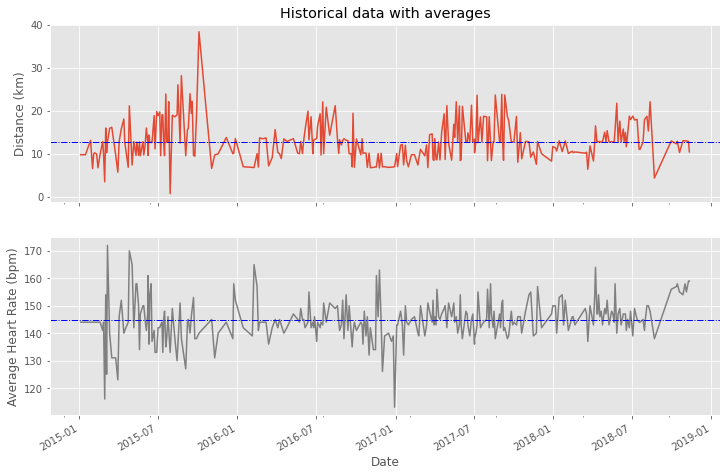

In [25]:
#Prepare data
runs_subset_2015_2018 = df_run[(df_run.index.year>=2015) & (df_run.index.year<=2018)]
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

#Create plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,8))

#Plot and customize first subplot
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

#Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date',ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(),color='blue',linewidth=1,linestyle='-.')

#show plot
plt.show()




# 7.Did i reach my goals?

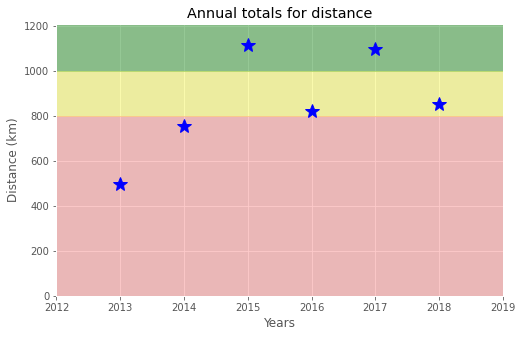

In [26]:
#Prepare data
df_run_dist_annual = df_run[(df_run.index.year>=2013) & (df_run.index.year<=2018)] ['Distance (km)'].resample('A').sum()
 
#Create plot
fig = plt.figure(figsize=(8,5))

#plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210],
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

plt.show()
    

# 8.Am i progressing?

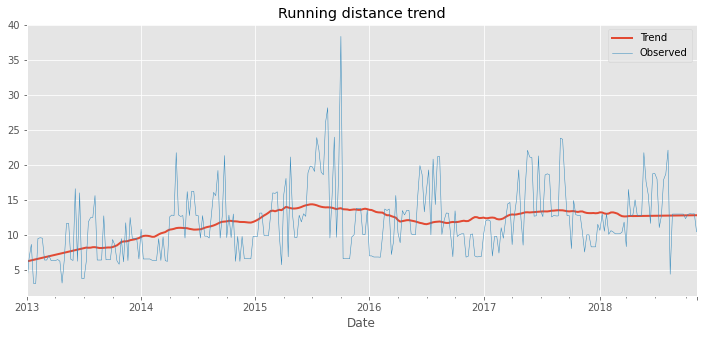

In [32]:
# Import required library
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare data
df_run_dist_wkly = df_run[(df_run.index.year>=2013) & (df_run.index.year<=2018)]['Distance (km)'].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

# Create plot
fig = plt.figure(figsize=(12,5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

# 9. Training intensity

C:\Users\signi\AppData\Local\Temp\ipykernel_8600\3523134172.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')


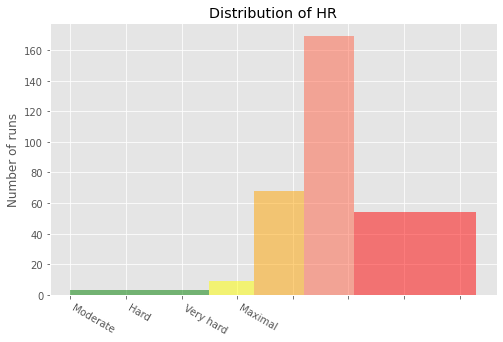

In [34]:
#Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green','yellow','orange','tomato','red']
df_run_hr_all = df_run[(df_run.index.year>=2015) & (df_run.index.year<=2018)]['Average Heart Rate (bpm)']

#Create plot
fig, ax = plt.subplots(figsize=(8,5))

#plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])
    
ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

plt.show()

# 10. Detailed Summary report

In [37]:
#Concatenating three Dataframes
df_run_walk_cycle = df_run.append(df_walk).append(df_cycle).sort_index(ascending=False)
dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

#Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')['Distance (km)', 'Climb (m)'].sum()
print('Totals for different training types:')
display(df_totals)

#Calculating summary statistics for each type of activities
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

#Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]
    
print('Summary statistics for different training types:')
df_summary.stack()

Totals for different training types:


C:\Users\signi\AppData\Local\Temp\ipykernel_8600\2277294172.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle = df_run.append(df_walk).append(df_cycle).sort_index(ascending=False)
C:\Users\signi\AppData\Local\Temp\ipykernel_8600\2277294172.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle = df_run.append(df_walk).append(df_cycle).sort_index(ascending=False)
C:\Users\signi\AppData\Local\Temp\ipykernel_8600\2277294172.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_totals = df_run_walk_cycle.groupby('Type')['Distance (km)', 'Climb (m)'].sum()


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000